#Instructor: Alfonso Berumen
#Pepperdine University
#ISTM 627

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Setting up the initial notebook**
####Import Python packages

In [ ]:
#RERUN THIS IF YOUR CONNECTION GETS RESET

#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import os as os

#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

#load some libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

#take the exponential
import math

#import regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#import os as os
#import statsmodels.api as sm

##Week 1

##Regression

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
#linear regression
ad_data=pd.read_csv("Advertising.csv",encoding = "utf-8") #import the data
len(ad_data)#number of records
ad_data.info()#fields
ad_data.head(30)

In [ ]:
#drop first column (row number)
ad_data=ad_data.drop(['Unnamed: 0'], axis=1)

In [ ]:
ad_data.describe

In [ ]:
#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
pd.plotting.scatter_matrix(ad_data)
plt.show()

In [ ]:
#correlation matrix
corrMatrix = ad_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

In [ ]:
#model
est = smf.ols('sales ~ TV + radio + newspaper',ad_data).fit()
est.summary().tables[1]

In [ ]:
#get standard output
est.summary()

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None

ad_data['yhat'] = pred #predicted values
ad_data['resid'] = resid #residual values

In [ ]:
#plot the actual and predicted
#plt.scatter(train['sales'],train['yhat'], marker='o')
#add a line
lineStart = ad_data.sales.min()
lineEnd = ad_data.sales.max()
plt.figure()
plt.scatter(ad_data['sales'],ad_data['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [ ]:
#residual
residcalc = ad_data['sales'] - ad_data['yhat']
residcalc.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Sales prediction error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#simple linear regression example
simple_all_est = smf.ols('sales ~ TV',ad_data).fit()
simple_all_est.summary().tables[1]

In [ ]:
#PLOT
plt.plot(ad_data['TV'],ad_data['sales'],'o',color='red')
m, b = np.polyfit(ad_data['TV'],ad_data['sales'], 1)
plt.plot(ad_data['TV'], m*ad_data['TV'] + b)
plt.show()

##Case Study: Baseball

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

In [ ]:
mlb_data=pd.read_csv("MLB Attendance.csv",encoding = "utf-8") #import the data
len(mlb_data)#number of records
mlb_data.info()#fields
mlb_data.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         2421 non-null   int64 
 1   home_team    2421 non-null   object
 2   month        2421 non-null   object
 3   day          2421 non-null   int64 
 4   attend       2421 non-null   int64 
 5   day_of_week  2421 non-null   object
 6   opponent     2421 non-null   object
 7   temp         2421 non-null   int64 
 8   skies        2421 non-null   object
 9   day_night    2421 non-null   object
 10  cap          2421 non-null   object
 11  shirt        2421 non-null   object
 12  fireworks    2421 non-null   object
 13  bobblehead   2421 non-null   object
dtypes: int64(4), object(10)
memory usage: 264.9+ KB


,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012,Baltimore Orioles,APR,6,46773,Friday,Minnesota Twins,59,Clear,Day,NO,NO,NO,NO
1,2012,Baltimore Orioles,APR,7,31532,Saturday,Minnesota Twins,63,Clear,Night,NO,NO,NO,NO
2,2012,Baltimore Orioles,APR,8,14738,Sunday,Minnesota Twins,68,Clear,Day,NO,NO,NO,NO
3,2012,Baltimore Orioles,APR,9,25478,Monday,New York Yankees,65,Cloudy,Night,NO,NO,NO,NO
4,2012,Baltimore Orioles,APR,10,24659,Tuesday,New York Yankees,62,Clear,Night,NO,NO,NO,NO
5,2012,Baltimore Orioles,APR,11,22919,Wednesday,New York Yankees,53,Cloudy,Night,NO,NO,NO,NO
6,2012,Baltimore Orioles,APR,24,11058,Tuesday,Toronto Blue Jays,60,Cloudy,Night,NO,NO,NO,NO
7,2012,Baltimore Orioles,APR,25,10415,Wednesday,Toronto Blue Jays,70,Clear,Night,NO,NO,NO,NO
8,2012,Baltimore Orioles,APR,26,13725,Thursday,Toronto Blue Jays,64,Cloudy,Night,NO,YES,NO,NO
9,2012,Baltimore Orioles,APR,27,18297,Friday,Oakland Athletics,60,Clear,Night,NO,NO,NO,NO


In [ ]:
#find team names and count of games
pd.crosstab(index=mlb_data['home_team'], columns='81')

In [ ]:
# prompt: filter the data to just the "Alanta Braves"

# Filter the data for the San Francisco Giants
sf_mlb_data = mlb_data[mlb_data['home_team'] == 'Atlanta Braves']

# Now giants_data contains only the information for the San Francisco Giants
sf_mlb_data

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1291,2012,Atlanta Braves,APR,13,50635,Friday,Milwaukee Brewers,69,Cloudy,Night,NO,NO,YES,NO
1292,2012,Atlanta Braves,APR,14,37408,Saturday,Milwaukee Brewers,75,Clear,Night,NO,NO,NO,NO
1293,2012,Atlanta Braves,APR,15,30831,Sunday,Milwaukee Brewers,75,Cloudy,Day,NO,NO,NO,NO
1294,2012,Atlanta Braves,APR,16,16161,Monday,New York Mets,71,Cloudy,Night,NO,NO,NO,NO
1295,2012,Atlanta Braves,APR,17,18732,Tuesday,New York Mets,68,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2012,Atlanta Braves,SEP,26,23420,Wednesday,Miami Marlins,82,Cloudy,Night,NO,NO,NO,NO
1368,2012,Atlanta Braves,SEP,27,27270,Thursday,Miami Marlins,84,Cloudy,Night,NO,NO,NO,NO
1369,2012,Atlanta Braves,SEP,28,51910,Friday,New York Mets,78,Cloudy,Night,NO,NO,YES,NO
1370,2012,Atlanta Braves,SEP,29,48310,Saturday,New York Mets,75,Cloudy,Night,NO,NO,NO,NO


In [ ]:
sf_mlb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1291 to 1371
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         81 non-null     int64 
 1   home_team    81 non-null     object
 2   month        81 non-null     object
 3   day          81 non-null     int64 
 4   attend       81 non-null     int64 
 5   day_of_week  81 non-null     object
 6   opponent     81 non-null     object
 7   temp         81 non-null     int64 
 8   skies        81 non-null     object
 9   day_night    81 non-null     object
 10  cap          81 non-null     object
 11  shirt        81 non-null     object
 12  fireworks    81 non-null     object
 13  bobblehead   81 non-null     object
dtypes: int64(4), object(10)
memory usage: 9.5+ KB


In [ ]:
sf_mlb_data.head()

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1291,2012,Atlanta Braves,APR,13,50635,Friday,Milwaukee Brewers,69,Cloudy,Night,NO,NO,YES,NO
1292,2012,Atlanta Braves,APR,14,37408,Saturday,Milwaukee Brewers,75,Clear,Night,NO,NO,NO,NO
1293,2012,Atlanta Braves,APR,15,30831,Sunday,Milwaukee Brewers,75,Cloudy,Day,NO,NO,NO,NO
1294,2012,Atlanta Braves,APR,16,16161,Monday,New York Mets,71,Cloudy,Night,NO,NO,NO,NO
1295,2012,Atlanta Braves,APR,17,18732,Tuesday,New York Mets,68,Cloudy,Night,NO,NO,NO,NO


In [ ]:
sf_mlb_data['year'].unique

<bound method Series.unique of 1291    2012
1292    2012
1293    2012
1294    2012
1295    2012
        ... 
1367    2012
1368    2012
1369    2012
1370    2012
1371    2012
Name: year, Length: 81, dtype: int64>

In [ ]:
#pct filled
#Dodgers capacity = 56,000
#Giants capacity = 41,915
sf_mlb_data['pct_full'] = (sf_mlb_data['attend']/41915)*100

<ipython-input-20-d92b7e9c5fac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_mlb_data['pct_full'] = (sf_mlb_data['attend']/41915)*100


In [ ]:
sf_mlb_data.head()

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,pct_full
1291,2012,Atlanta Braves,APR,13,50635,Friday,Milwaukee Brewers,69,Cloudy,Night,NO,NO,YES,NO,120.804008
1292,2012,Atlanta Braves,APR,14,37408,Saturday,Milwaukee Brewers,75,Clear,Night,NO,NO,NO,NO,89.247286
1293,2012,Atlanta Braves,APR,15,30831,Sunday,Milwaukee Brewers,75,Cloudy,Day,NO,NO,NO,NO,73.556006
1294,2012,Atlanta Braves,APR,16,16161,Monday,New York Mets,71,Cloudy,Night,NO,NO,NO,NO,38.556603
1295,2012,Atlanta Braves,APR,17,18732,Tuesday,New York Mets,68,Cloudy,Night,NO,NO,NO,NO,44.690445


([], [])

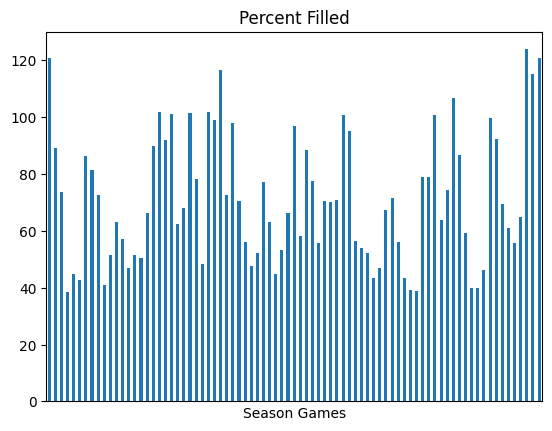

In [ ]:
sf_mlb_data['pct_full'].plot(kind="bar", title="test")
plt.title("Percent Filled")
plt.xlabel('Season Games')
plt.xticks([])

<Axes: xlabel='day_of_week', ylabel='attend'>

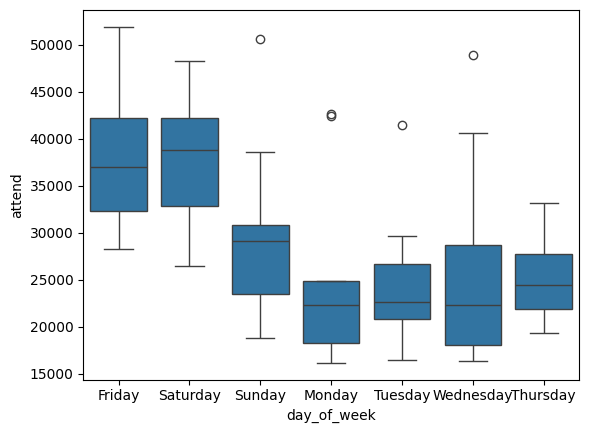

In [ ]:
#boxplot
boxplot = sn.boxplot(x="day_of_week", y="attend", data=sf_mlb_data)
boxplot

<Axes: xlabel='month', ylabel='attend'>

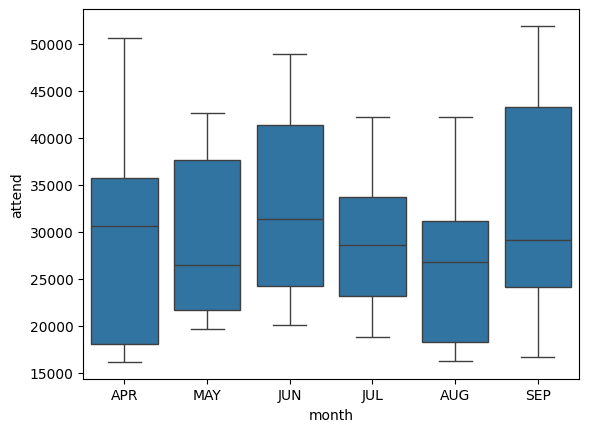

In [ ]:
boxplot = sn.boxplot(x="month", y="attend", data=sf_mlb_data)
boxplot

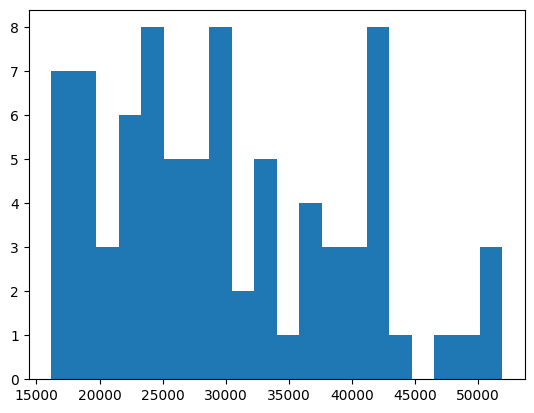

In [ ]:
#histogram
plt.hist(sf_mlb_data["attend"], bins = 20)
plt.show()

In [ ]:
#promotion counts
pd.crosstab(index=sf_mlb_data['bobblehead'], columns='count')

col_0,count
bobblehead,
NO,78
YES,3


In [ ]:
#model
est = smf.ols('attend ~ day_of_week + month + temp + skies + bobblehead',sf_mlb_data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.35e+04,1.28e+04,4.980,0.000,3.8e+04,8.9e+04
day_of_week[T.Monday],-1.376e+04,3217.665,-4.278,0.000,-2.02e+04,-7338.456
day_of_week[T.Saturday],-693.0071,2980.193,-0.233,0.817,-6644.864,5258.850
day_of_week[T.Sunday],-9308.8690,2959.551,-3.145,0.003,-1.52e+04,-3398.237
day_of_week[T.Thursday],-1.398e+04,3342.937,-4.182,0.000,-2.07e+04,-7303.451
day_of_week[T.Tuesday],-1.632e+04,3029.132,-5.389,0.000,-2.24e+04,-1.03e+04
day_of_week[T.Wednesday],-1.362e+04,3100.330,-4.392,0.000,-1.98e+04,-7425.296
month[T.AUG],-1244.2924,3612.735,-0.344,0.732,-8459.423,5970.838
month[T.JUL],5621.0073,3609.296,1.557,0.124,-1587.254,1.28e+04
month[T.JUN],5018.4637,3598.122,1.395,0.168,-2167.481,1.22e+04


In [ ]:
#get standard output
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4.850
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           3.44e-06
Time:                        01:12:50   Log-Likelihood:                -826.74
No. Observations:                  81   AIC:                             1685.
Df Residuals:                      65   BIC:                             1724.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  6.35e+04   1.28e+04      4.980      0.000     3.8e+04     8.9e+04
day_of_week[T.Monday]    -1.376e+04   3217.665     -4.278      0.000   -2.02e+04   -7338.456
day_of_week[T.Saturday]   -693.0071   2980.193     -0.233      0.817   -6644.864    5258.850
day_of_week[T.Sunday]    -9308.8690   2959.551     -3.145      0.003   -1.52e+04   -3398.237
day_of_week[T.Thursday]  -1.398e+04   3342.937     -4.182      0.000   -2.07e+04   -7303.451
day_of_week[T.Tuesday]   -1.632e+04   3029.132     -5.389      0.000   -2.24e+04   -1.03e+04
day_of_week[T.Wednesday] -1.362e+04   3100.330     -4.392      0.000   -1.98e+04   -7425.296
month[T.AUG]             -1244.2924   3612.735     -0.344      0.732   -8459.423    5970.838
month[T.JUL]              5621.0073   3609.296      1.557      0.124   -1587.254    1.28e+04
month[T.JUN]              5018.4637   3598.122      1.395      0.168   -2167.481    1.22e+04
month[T.MAY]              6609.6202   3678.157      1.797      0.077    -736.167     1.4e+04
month[T.SEP]              6315.5815   3432.897      1.840      0.070    -540.387    1.32e+04
skies[T.Cloudy]           -615.2021   2705.375     -0.227      0.821   -6018.209    4787.805
skies[T.Rainy]           -1.076e+04   8777.531     -1.226      0.225   -2.83e+04    6766.015
bobblehead[T.YES]         1.091e+04   4663.618      2.339      0.022    1592.398    2.02e+04
temp                      -342.1039    151.696     -2.255      0.027    -645.062     -39.146
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.906
Skew:                           0.481   Prob(JB):                       0.0860
Kurtosis:                       3.726   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None

sf_mlb_data['yhat'] = pred #predicted values
sf_mlb_data['resid'] = resid #residual values

<ipython-input-30-83afeabf42e4>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


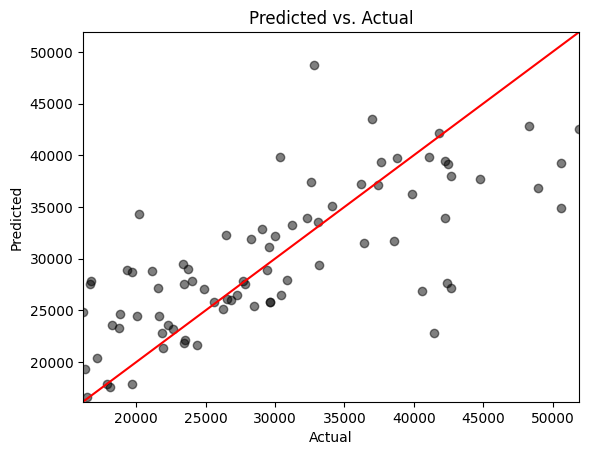

In [ ]:
#plot the actual and predicted
#add a line
lineStart = sf_mlb_data.attend.min()
lineEnd = sf_mlb_data.attend.max()
plt.figure()
plt.scatter(sf_mlb_data['attend'],sf_mlb_data['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

##Using R in Google Colab, see:
#####https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497